In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from helpers.data_prep import *
from helpers.eda import *
from sklearn.preprocessing import StandardScaler

import pickle

from warnings import filterwarnings
filterwarnings("ignore", category=FutureWarning)
filterwarnings("ignore")

In [3]:
pd.set_option("display.max_columns" ,None)
pd.set_option("display.width", 200)
pd.set_option("display.float_format" , lambda x : "%.3f" % x)

In [4]:
def titanic():
    
    dataframe = pd.read_csv("/Users/gokhanersoz/Desktop/VBO_Dataset/titanic.csv")
    
    return dataframe                        

In [5]:
df = titanic()

In [6]:
def boxplot(dataframe, num_cols):
    
    i = 1
    size = 15
    num_ = len(num_cols)
    plt.figure(figsize =(12,7))
    
    for num in num_cols:
        
        plt.subplot(num_,1,i)
        sns.boxplot(dataframe[num])
        plt.xlabel(f"{num.upper()}", fontsize = size)
        plt.ylabel("Values".upper(), fontsize = size)
        plt.title(f"{num.upper()} Outliers", fontsize = size)       
        plt.tight_layout()
        i+=1
               
    plt.show()

In [7]:
check_df(df)

##################### SHAPE ######################

(891, 12)

##################### TYPES ######################

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

###################### HEAD ######################

   PassengerId  Survived  Pclass                                               Name     Sex    Age  SibSp  Parch            Ticket   Fare Cabin Embarked
0            1         0       3                            Braund, Mr. Owen Harris    male 22.000      1      0         A/5 21171  7.250   NaN        S
1            2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female 38.000      1      0          PC 17599 71.283   C85        C
2            3         1       3                             Heikkinen, Miss. Laina

In [8]:
cat_cols ,num_cols, cat_but_car = grab_col_names(df,details = True)

Observations : 891
Variables : 12
Cat Cols : 9
Num Cols : 3
Cat But Car : 3
Num But Cat : 4


In [9]:
for cat in cat_cols:
    target_summary_with_cat(df, "Survived", cat)

                                       TARGET_MEAN
Name                                              
Abbing, Mr. Anthony                              0
Abbott, Mr. Rossmore Edward                      0
Abbott, Mrs. Stanton (Rosa Hunt)                 1
Abelson, Mr. Samuel                              0
Abelson, Mrs. Samuel (Hannah Wizosky)            1
...                                            ...
de Mulder, Mr. Theodore                          1
de Pelsmaeker, Mr. Alfons                        0
del Carlo, Mr. Sebastiano                        0
van Billiard, Mr. Austin Blyler                  0
van Melkebeke, Mr. Philemon                      0

[891 rows x 1 columns]

        TARGET_MEAN
Sex                
female        0.742
male          0.189

             TARGET_MEAN
Ticket                  
110152             1.000
110413             0.667
110465             0.000
110564             1.000
110813             1.000
...                  ...
W./C. 6608         0.000
W./C. 

In [10]:
for num in num_cols:
    target_summary_with_num(df , "Survived", num)

          PassengerId
Survived             
0             447.016
1             444.368

            Age
Survived       
0        30.626
1        28.344

           Fare
Survived       
0        22.118
1        48.395



                                                    NAME  RATIO
Louch, Mrs. Charles Alexander (Alice Adelaide S...     1  0.112
Herman, Mrs. Samuel (Jane Laver)                       1  0.112
Harper, Mrs. Henry Sleeper (Myna Haxtun)               1  0.112
Seward, Mr. Frederic Kimber                            1  0.112
Thayer, Mrs. John Borland (Marian Longstreth Mo...     1  0.112
...                                                  ...    ...
Madigan, Miss. Margaret "Maggie"                       1  0.112
Rogers, Mr. William John                               1  0.112
Kink, Mr. Vincenz                                      1  0.112
Kenyon, Mrs. Frederick R (Marion)                      1  0.112
Strandberg, Miss. Ida Sofia                            1  0.112

[891 rows x 2 columns]

##################################################



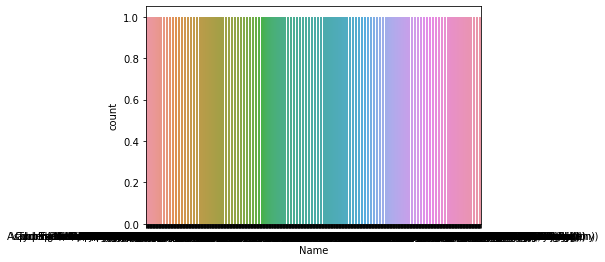

        SEX  RATIO
male    577 64.759
female  314 35.241

##################################################



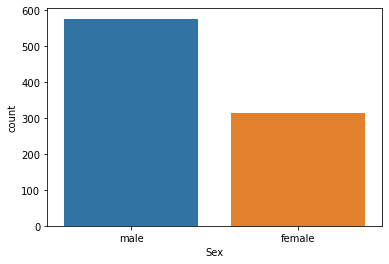

                  TICKET  RATIO
CA. 2343               7  0.786
1601                   7  0.786
347082                 7  0.786
347088                 6  0.673
3101295                6  0.673
...                  ...    ...
315151                 1  0.112
364500                 1  0.112
C.A. 24580             1  0.112
STON/O2. 3101283       1  0.112
3101298                1  0.112

[681 rows x 2 columns]

##################################################



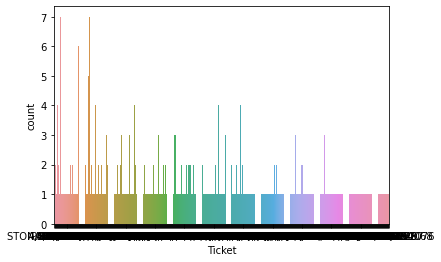

             CABIN  RATIO
G6               4  0.449
C23 C25 C27      4  0.449
B96 B98          4  0.449
F2               3  0.337
C22 C26          3  0.337
...            ...    ...
C103             1  0.112
B101             1  0.112
B82 B84          1  0.112
E38              1  0.112
B73              1  0.112

[147 rows x 2 columns]

##################################################



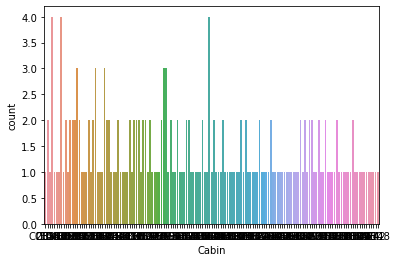

   EMBARKED  RATIO
S       644 72.278
C       168 18.855
Q        77  8.642

##################################################



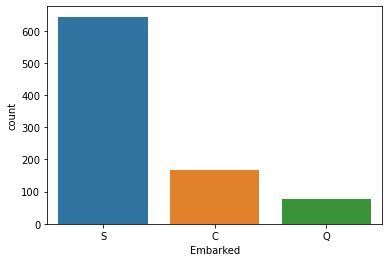

   SURVIVED  RATIO
0       549 61.616
1       342 38.384

##################################################



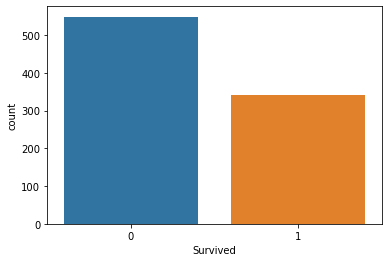

   PCLASS  RATIO
3     491 55.107
1     216 24.242
2     184 20.651

##################################################



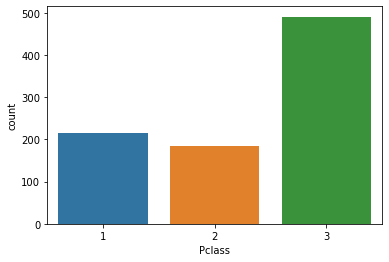

   SIBSP  RATIO
0    608 68.238
1    209 23.457
2     28  3.143
4     18  2.020
3     16  1.796
8      7  0.786
5      5  0.561

##################################################



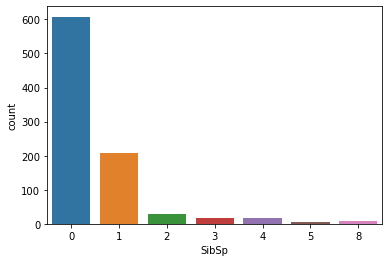

   PARCH  RATIO
0    678 76.094
1    118 13.244
2     80  8.979
3      5  0.561
5      5  0.561
4      4  0.449
6      1  0.112

##################################################



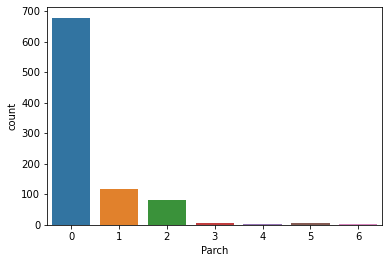

In [11]:
for cat in cat_cols:
    cat_summary(df , cat, plot = True)

              count    mean     std   min     5%    10%     20%     30%     40%     50%     60%     70%     80%     90%     95%     99%     max
PassengerId 891.000 446.000 257.354 1.000 45.500 90.000 179.000 268.000 357.000 446.000 535.000 624.000 713.000 802.000 846.500 882.100 891.000
Survived    891.000   0.384   0.487 0.000  0.000  0.000   0.000   0.000   0.000   0.000   0.000   1.000   1.000   1.000   1.000   1.000   1.000
Pclass      891.000   2.309   0.836 1.000  1.000  1.000   1.000   2.000   2.000   3.000   3.000   3.000   3.000   3.000   3.000   3.000   3.000
Age         714.000  29.699  14.526 0.420  4.000 14.000  19.000  22.000  25.000  28.000  31.800  36.000  41.000  50.000  56.000  65.870  80.000
SibSp       891.000   0.523   1.103 0.000  0.000  0.000   0.000   0.000   0.000   0.000   0.000   1.000   1.000   1.000   3.000   5.000   8.000
Parch       891.000   0.382   0.806 0.000  0.000  0.000   0.000   0.000   0.000   0.000   0.000   0.000   1.000   2.000   2.000   4.000 

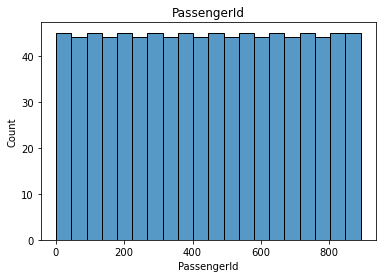

              count    mean     std   min     5%    10%     20%     30%     40%     50%     60%     70%     80%     90%     95%     99%     max
PassengerId 891.000 446.000 257.354 1.000 45.500 90.000 179.000 268.000 357.000 446.000 535.000 624.000 713.000 802.000 846.500 882.100 891.000
Survived    891.000   0.384   0.487 0.000  0.000  0.000   0.000   0.000   0.000   0.000   0.000   1.000   1.000   1.000   1.000   1.000   1.000
Pclass      891.000   2.309   0.836 1.000  1.000  1.000   1.000   2.000   2.000   3.000   3.000   3.000   3.000   3.000   3.000   3.000   3.000
Age         714.000  29.699  14.526 0.420  4.000 14.000  19.000  22.000  25.000  28.000  31.800  36.000  41.000  50.000  56.000  65.870  80.000
SibSp       891.000   0.523   1.103 0.000  0.000  0.000   0.000   0.000   0.000   0.000   0.000   1.000   1.000   1.000   3.000   5.000   8.000
Parch       891.000   0.382   0.806 0.000  0.000  0.000   0.000   0.000   0.000   0.000   0.000   0.000   1.000   2.000   2.000   4.000 

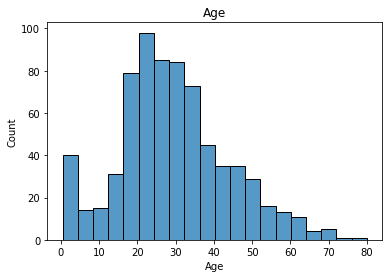

              count    mean     std   min     5%    10%     20%     30%     40%     50%     60%     70%     80%     90%     95%     99%     max
PassengerId 891.000 446.000 257.354 1.000 45.500 90.000 179.000 268.000 357.000 446.000 535.000 624.000 713.000 802.000 846.500 882.100 891.000
Survived    891.000   0.384   0.487 0.000  0.000  0.000   0.000   0.000   0.000   0.000   0.000   1.000   1.000   1.000   1.000   1.000   1.000
Pclass      891.000   2.309   0.836 1.000  1.000  1.000   1.000   2.000   2.000   3.000   3.000   3.000   3.000   3.000   3.000   3.000   3.000
Age         714.000  29.699  14.526 0.420  4.000 14.000  19.000  22.000  25.000  28.000  31.800  36.000  41.000  50.000  56.000  65.870  80.000
SibSp       891.000   0.523   1.103 0.000  0.000  0.000   0.000   0.000   0.000   0.000   0.000   1.000   1.000   1.000   3.000   5.000   8.000
Parch       891.000   0.382   0.806 0.000  0.000  0.000   0.000   0.000   0.000   0.000   0.000   0.000   1.000   2.000   2.000   4.000 

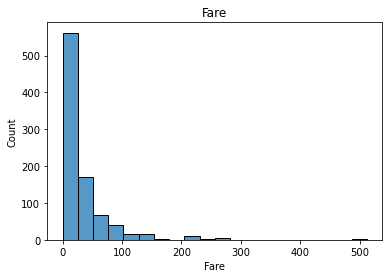

In [12]:
for num in num_cols:
    num_summary(df, num, plot = True)

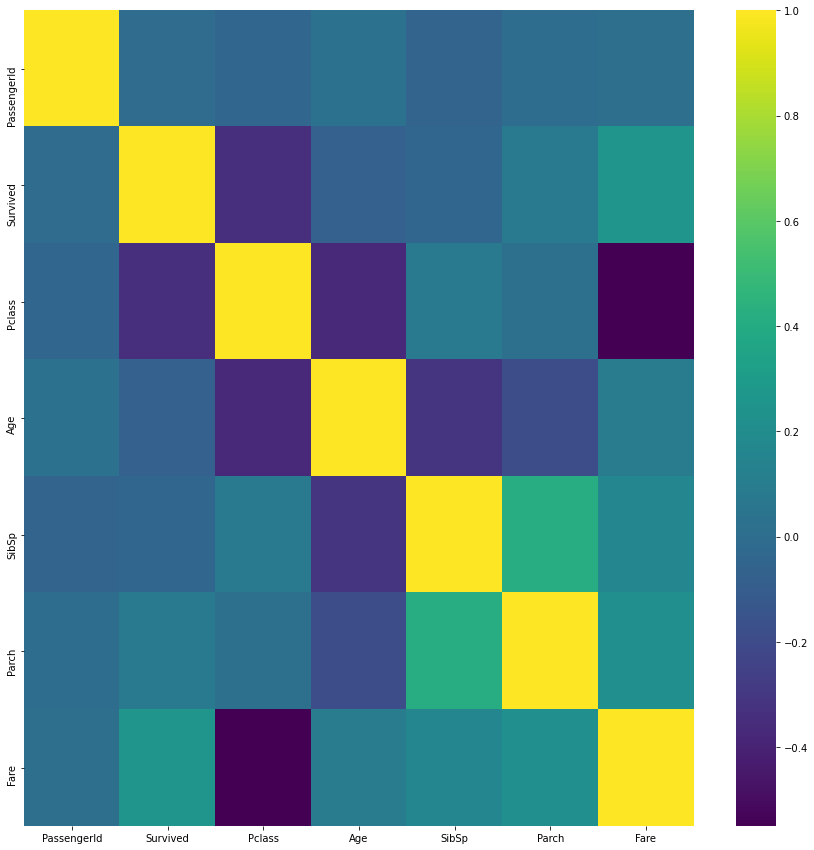

[]

In [13]:
high_correlated_cols(df , plot = True)

In [14]:
for num in num_cols:
    print(f"For {num.upper()} Outliers : ", check_outliers(df, num))

For PASSENGERID Outliers :  There Are Not Outliers
For AGE Outliers :  There Are Outliers
For FARE Outliers :  There Are Outliers


In [15]:
grap_outliers(df,"Age")

     PassengerId  Survived  Pclass                            Name   Sex    Age  SibSp  Parch      Ticket   Fare Cabin Embarked
33            34         0       2           Wheadon, Mr. Edward H  male 66.000      0      0  C.A. 24579 10.500   NaN        S
54            55         0       1  Ostby, Mr. Engelhart Cornelius  male 65.000      0      1      113509 61.979   B30        C
96            97         0       1       Goldschmidt, Mr. George B  male 71.000      0      0    PC 17754 34.654    A5        C
116          117         0       3            Connors, Mr. Patrick  male 70.500      0      0      370369  7.750   NaN        Q
280          281         0       3                Duane, Mr. Frank  male 65.000      0      0      336439  7.750   NaN        Q


In [16]:
grap_outliers(df,"Fare")

    PassengerId  Survived  Pclass                                               Name     Sex    Age  SibSp  Parch    Ticket    Fare        Cabin Embarked
1             2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female 38.000      1      0  PC 17599  71.283          C85        C
27           28         0       1                     Fortune, Mr. Charles Alexander    male 19.000      3      2     19950 263.000  C23 C25 C27        S
31           32         1       1     Spencer, Mrs. William Augustus (Marie Eugenie)  female    NaN      1      0  PC 17569 146.521          B78        C
34           35         0       1                            Meyer, Mr. Edgar Joseph    male 28.000      1      0  PC 17604  82.171          NaN        C
52           53         1       1           Harper, Mrs. Henry Sleeper (Myna Haxtun)  female 49.000      1      0  PC 17572  76.729          D33        C


In [17]:
grap_outliers(df,"PassengerId")

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


In [18]:
na_columns = missing_values_table(df , na_name=True)

          n_miss  ratio
Cabin        687 77.104
Age          177 19.865
Embarked       2  0.224



In [19]:
missing_vs_target(df , "Survived", na_columns = na_columns)

             TARGET_MEAN  Count
Age_NA_FLAG                    
0                  0.406    714
1                  0.294    177

               TARGET_MEAN  Count
Cabin_NA_FLAG                    
0                    0.667    204
1                    0.300    687

                  TARGET_MEAN  Count
Embarked_NA_FLAG                    
0                       0.382    889
1                       1.000      2



In [20]:
rare_analyser(df , "Survived", cat_cols)

FOR NAME : 891

                                       COUNT  RATIO  TARGET_MEAN
Abbing, Mr. Anthony                        1  0.001            0
Abbott, Mr. Rossmore Edward                1  0.001            0
Abbott, Mrs. Stanton (Rosa Hunt)           1  0.001            1
Abelson, Mr. Samuel                        1  0.001            0
Abelson, Mrs. Samuel (Hannah Wizosky)      1  0.001            1
...                                      ...    ...          ...
de Mulder, Mr. Theodore                    1  0.001            1
de Pelsmaeker, Mr. Alfons                  1  0.001            0
del Carlo, Mr. Sebastiano                  1  0.001            0
van Billiard, Mr. Austin Blyler            1  0.001            0
van Melkebeke, Mr. Philemon                1  0.001            0

[891 rows x 3 columns]

FOR SEX : 2

        COUNT  RATIO  TARGET_MEAN
female    314  0.352        0.742
male      577  0.648        0.189

FOR TICKET : 681

             COUNT  RATIO  TARGET_MEAN
110152

In [21]:
def titanic():
    
    dataframe = pd.read_csv("/Users/gokhanersoz/Desktop/VBO_Dataset/titanic.csv")
    
    return dataframe                        

df = titanic()

def titanic_data_prep(dataframe):
    
    # 1 - Feature Engineering
    
    dataframe.columns = [col.upper() for col in dataframe.columns]
    
    # New Cabin Bool
    dataframe["NEW_CABIN_BOOL"] = dataframe["CABIN"].notnull().astype(int)
    
    # Name Count
    dataframe["NEW_NAME_COUNT"] = dataframe["NAME"].str.len()
    
    # Name Word Count
    dataframe["NEW_NAME_WORD_COUNT"] = dataframe["NAME"].apply(lambda name : len(str(name).split(" ")))
    
    # Name Dr
    dataframe["NEW_NAME_DR"] = dataframe["NAME"].apply(lambda name : len([word for word in name.split(" ") \
                                                                      if word.startswith("Dr.")]))
    
    #dataframe["NEW_NAME_MR"] = dataframe["NAME"].apply(lambda name : len([word for word in name.split(" ") \
    #                                                                  if word.startswith("Mr.")]))
    
    #dataframe["NEW_NAME_MR"] = dataframe["NAME"].apply(lambda name : len([word for word in name.split(" ") \
    #                                                                  if word.startswith("Mr.")]))
    
    #dataframe["NEW_NAME_MRS"] = dataframe["NAME"].apply(lambda name : len([word for word in name.split(" ") \
    #                                                                  if word.startswith("Mrs.")]))
    
    #dataframe["NEW_NAME_MİSS"] = dataframe["NAME"].apply(lambda name : len([word for word in name.split(" ") \
    #                                                                  if word.startswith("Miss.")]))
    
    dataframe["NEW_TITLE"] = dataframe["NAME"].str.extract( " ([A-Za-z]+)\.", expand = False)
    
    
    # We include ourselves
    # Family Size
    dataframe["NEW_FAMILY_SIZE"] = dataframe["SIBSP"] + dataframe["PARCH"] + 1
    
    # New Age PClass
    dataframe["NEW_AGE_PCLASS"] = dataframe["AGE"] * dataframe["PCLASS"]
    
    # Is Alone
    dataframe.loc[ (dataframe["SIBSP"] + dataframe["PARCH"] ) > 0, "NEW_IS_ALONE"] = "NO"
    dataframe.loc[ (dataframe["SIBSP"] + dataframe["PARCH"] ) == 0,"NEW_IS_ALONE"] = "YES"
    
    # Age_Cat
    # Age Level
    dataframe.loc[ (dataframe["AGE"] < 18) , "NEW_AGE_CAT"] = "young"
    dataframe.loc[ ((dataframe["AGE"] >= 18) & (dataframe["AGE"] < 56)), "NEW_AGE_CAT"] = "mature"
    dataframe.loc[ (dataframe["AGE"] >= 56), "NEW_AGE_CAT"] = "senior"
    
    
    # Sex X Age
    # Sex - Male
    dataframe.loc[ ((dataframe["SEX"] == "male") & (dataframe["AGE"] <= 21)) ,"NEW_SEX_CAT"] = "youngmale"
    dataframe.loc[ ((dataframe["SEX"] == "male") & ((dataframe["AGE"] > 21) & (dataframe["AGE"] < 50))) , \
                                                                              "NEW_SEX_CAT"] = "maturemale"
    dataframe.loc[ ((dataframe["SEX"] == "male") & (dataframe["AGE"] >= 50)) ,"NEW_SEX_CAT"] = "seniormale"
    
    # Sex - Female
    dataframe.loc[ ((dataframe["SEX"] == "female") & (dataframe["AGE"] <= 21)) ,"NEW_SEX_CAT"] = "youngfemale"
    dataframe.loc[ ((dataframe["SEX"] == "female") & ((dataframe["AGE"] > 21) & (dataframe["AGE"] < 50))) , \
                                                                              "NEW_SEX_CAT"] = "maturefemale"
    dataframe.loc[ ((dataframe["SEX"] == "female") & (dataframe["AGE"] >= 50)) ,"NEW_SEX_CAT"] = "seniorfemale"
    
    
    # 2- We caught the variables!!!
    
    cat_cols , num_cols , cat_but_car = grab_col_names(dataframe, details = True)
    
    num_cols = [col for col in num_cols if "PASSENGERID" not in col]
    
    # We destroyed outliers !!!!
    
    for col in num_cols:
        replace_with_thresholds(dataframe,col)
        
    #dataframe.drop("CABIN", inplace = True, axis = 1)
    
    # Remove unnecessary columns
    
    remove_cols = ["TICKET","NAME","CABIN"]
    dataframe.drop(remove_cols , inplace = True , axis = 1)
    
    # We Filled In The Missing Values
    
    dataframe["AGE"] = dataframe["AGE"].fillna(dataframe.groupby("NEW_TITLE")["AGE"].transform("median"))
    
    #missing_values_table(dataframe)
    
    dataframe["NEW_AGE_PCLASS"] = dataframe["AGE"] * dataframe["PCLASS"]
    
    # Age_Level
    # Age_Cat
    
    dataframe.loc[ (dataframe["AGE"] < 18) , "NEW_AGE_CAT"] = "young"
    dataframe.loc[ ((dataframe["AGE"] >= 18) & (dataframe["AGE"] < 56)), "NEW_AGE_CAT"] = "mature"
    dataframe.loc[ (dataframe["AGE"] >= 56), "NEW_AGE_CAT"] = "senior"
    
    # Sex X Age
    # Sex - Male
    dataframe.loc[ ((dataframe["SEX"] == "male") & (dataframe["AGE"] <= 21)) ,"NEW_SEX_CAT"] = "youngmale"
    dataframe.loc[ ((dataframe["SEX"] == "male") & ((dataframe["AGE"] > 21) & (dataframe["AGE"] < 50))) , \
                                                                              "NEW_SEX_CAT"] = "maturemale"
    dataframe.loc[ ((dataframe["SEX"] == "male") & (dataframe["AGE"] >= 50)) ,"NEW_SEX_CAT"] = "seniormale"
    
    # Sex - Female
    dataframe.loc[ ((dataframe["SEX"] == "female") & (dataframe["AGE"] <= 21)) ,"NEW_SEX_CAT"] = "youngfemale"
    dataframe.loc[ ((dataframe["SEX"] == "female") & ((dataframe["AGE"] > 21) & (dataframe["AGE"] < 50))) , \
                                                                              "NEW_SEX_CAT"] = "maturefemale"
    dataframe.loc[ ((dataframe["SEX"] == "female") & (dataframe["AGE"] >= 50)) ,"NEW_SEX_CAT"] = "seniorfemale"
    
    # We Filled In The Missing Values
    dataframe["EMBARKED"] = dataframe["EMBARKED"].fillna(dataframe["EMBARKED"].mode()[0])
    
    cat_cols ,num_cols, cat_but_car = grab_col_names(dataframe)
    
    for num in num_cols:
        replace_with_thresholds(dataframe, num)
    
    # 4- Label Encoding Application
    binary_cols = [col for col in dataframe.columns if dataframe[col].dtype not in [np.int64 ,np.float64]
                   and dataframe[col].nunique() == 2 ]
    
    #print(binary_cols)
    for binary in binary_cols:
        dataframe = label_encoder(dataframe, binary)
      
    # 5- Rare Encoding Application
    dataframe = rare_encoder(dataframe,0.01)
    
    # 6- One-Hot Encoding Application
    
    #ohe_cols = [col for col in dataframe.columns if 10 >= dataframe[col].nunique() > 2]
    
    cat_cols , num_cols, cat_but_car = grab_col_names(dataframe)
    
    
    cat_cols = [col for col in cat_cols if col not in "SURVIVED"]
        
    dataframe = one_hot_encoder(dataframe, cat_cols)
    
    #7- The process of deleting useless columns
    
    num_cols = [col for col in num_cols if "PASSENGERID" not in col]
    
    useless_cols = [col for col in dataframe.columns if dataframe[col].nunique() == 2 and
                    (dataframe[col].value_counts() / len(dataframe) < 0.01).any(axis = None)]
    
    #print(useless_cols)
    
    dataframe.drop(useless_cols, axis = 1, inplace = True)
    
    dataframe.drop("PASSENGERID",inplace = True , axis = 1)
    
    #8- Standart Scaler
    
    scaler = StandardScaler()
    dataframe[num_cols] = scaler.fit_transform(dataframe[num_cols])
    
    return dataframe ,scaler

In [22]:
titanic, scaler = titanic_data_prep(df)

Observations : 891
Variables : 22
Cat Cols : 17
Num Cols : 5
Cat But Car : 3
Num But Cat : 8


In [23]:
titanic.head()

,SURVIVED,AGE,FARE,NEW_NAME_COUNT,NEW_AGE_PCLASS,EMBARKED_C,EMBARKED_Q,EMBARKED_S,NEW_TITLE_Master,NEW_TITLE_Miss,NEW_TITLE_Mr,NEW_TITLE_Mrs,NEW_TITLE_Rare,NEW_AGE_CAT_mature,NEW_AGE_CAT_senior,NEW_AGE_CAT_young,NEW_SEX_CAT_maturefemale,NEW_SEX_CAT_maturemale,NEW_SEX_CAT_seniorfemale,NEW_SEX_CAT_seniormale,NEW_SEX_CAT_youngfemale,NEW_SEX_CAT_youngmale,PCLASS_1,PCLASS_2,PCLASS_3,SEX_0,SEX_1,SIBSP_0,SIBSP_1,SIBSP_2,SIBSP_3,SIBSP_4,PARCH_0,PARCH_1,PARCH_2,NEW_CABIN_BOOL_0,NEW_CABIN_BOOL_1,NEW_NAME_WORD_COUNT_3,NEW_NAME_WORD_COUNT_4,NEW_NAME_WORD_COUNT_5,NEW_NAME_WORD_COUNT_6,NEW_NAME_WORD_COUNT_7,NEW_NAME_WORD_COUNT_8,NEW_FAMILY_SIZE_1,NEW_FAMILY_SIZE_2,NEW_FAMILY_SIZE_3,NEW_FAMILY_SIZE_4,NEW_FAMILY_SIZE_5,NEW_FAMILY_SIZE_6,NEW_FAMILY_SIZE_7,NEW_IS_ALONE_0,NEW_IS_ALONE_1
0,0,-0.566,-0.821,-0.437,0.073,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
1,1,0.709,2.032,2.248,-0.799,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
2,1,-0.248,-0.788,-0.559,0.446,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,1,0.470,1.419,2.126,-0.893,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
4,0,0.470,-0.781,-0.315,1.287,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1


In [24]:
import pickle

pd.to_pickle(titanic, open("titanic_prep.pkl", "wb"))
pd.to_pickle(scaler, open("scaler_titanic.pkl", "wb"))

## Model

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate,GridSearchCV

In [26]:
X = titanic.drop("SURVIVED",axis = 1)
y = titanic["SURVIVED"]

print("X DataFrame Shape : {}".format(X.shape))
print("Y DataFrame Shape : {}".format(y.shape))

X DataFrame Shape : (891, 51)
Y DataFrame Shape : (891,)


# Success Evaluation (Validation) with Holdout Method

In [27]:
from sklearn.metrics import r2_score,recall_score,precision_score,f1_score,accuracy_score,roc_auc_score,\
                            classification_report,confusion_matrix,roc_curve

from sklearn.model_selection import train_test_split

def score_test(model , X , y,roc_auc_plot = True, matrix = True):
    
    X_train,X_test,y_train,y_test = train_test_split(X, y, test_size =.2, random_state = 18)
    
    model.fit(X_train, y_train)
    
    y_pred_test = model.predict(X_test)
    y_prob_test = model.predict_proba(X_test)[:,1]
    
    y_pred_train = model.predict(X_train)
    y_prob_train = model.predict_proba(X_train)[:,1]
    
    print("".center(50,"#"),end = "\n\n")
    print(f" {type(model).__name__.upper()} ".center(50,"#"),end = "\n\n")
    print(" Classification Report ".center(50,"#") ,end = "\n\n")
    print(classification_report(y_test, y_pred_test),end = "\n\n")
    
    print(" Confusion Matrix ".center(50,"#") ,end = "\n\n")
    index = [["actual","actual"],["Died","Alive"]]
    columns = [["Predicted","Predicted"], ["Died","Alive"]]
    data = confusion_matrix(y_test,y_pred_test)
    last_data = pd.DataFrame(data = data , columns = columns, index = index)
    print(last_data ,end = "\n\n")
    
    
    print(" test scores ".upper().center(50,"#"),end = "\n\n")
    print(" accuracy score : ".upper(), accuracy_score(y_test,y_pred_test) ,end = "\n\n")
    print(" roc auc score : ".upper(), roc_auc_score(y_test,y_pred_test) ,end = "\n\n")
    print(" r2 score : ".upper(), r2_score(y_test,y_pred_test) ,end = "\n\n")
    print(" recall score : ".upper(), recall_score(y_test,y_pred_test) ,end = "\n\n")
    print(" f1 score : ".upper(), f1_score(y_test,y_pred_test) ,end = "\n\n")
    print(" precision score : ".upper(), precision_score(y_test,y_pred_test) ,end = "\n\n")
    
    print("".center(50,"#"),end = "\n\n")
    
    if roc_auc_plot:
        
        size = 15
        roc_score = roc_auc_score(y_test, y_prob_test)
        
        plt.figure(figsize = (7,5))
        
        fpr,tpr,threshold = roc_curve(y_test, y_prob_test)
        plt.plot(fpr,tpr , label = f"ROC AUC{round(roc_score,4)}")
        plt.plot([0,1],[0,1],"--r")
        plt.xlabel(" False Positive Rate ", fontsize = size)
        plt.ylabel(" True Positive Rate ", fontsize = size)
        plt.title(" AUC ( Area : %.3f) " % roc_score , fontsize = size)
        plt.legend()
        plt.show();
        
    if matrix:
        
        fig,ax = plt.subplots(figsize = (7,5))
        
        cm = confusion_matrix(y_test , y_pred_test)
        
        ax = sns.heatmap(data = cm, annot = True, annot_kws= {"size" : 25}, fmt = ".4g", ax = ax,
                         cmap = "rainbow", linewidths= 3, linecolor= "white", cbar = False, center = 0)
        
        size = 15
        plt.xlabel(" Predicted Label ", fontsize = size)
        plt.ylabel(" True Label ", fontsize = size)
        plt.title(f" Confusion Matrix For {type(model).__name__.upper()} ", fontsize = size)
        plt.show()

##################################################

############### LOGISTICREGRESSION ###############

############# Classification Report ##############

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       109
           1       0.88      0.87      0.88        70

    accuracy                           0.91       179
   macro avg       0.90      0.90      0.90       179
weighted avg       0.90      0.91      0.90       179


################ Confusion Matrix ################

             Predicted      
                  Died Alive
actual Died        101     8
       Alive         9    61

################## TEST SCORES ###################

 ACCURACY SCORE :  0.9050279329608939

 ROC AUC SCORE :  0.8990170380078637

 R2 SCORE :  0.6011795543905636

 RECALL SCORE :  0.8714285714285714

 F1 SCORE :  0.8776978417266188

 PRECISION SCORE :  0.8840579710144928

##################################################



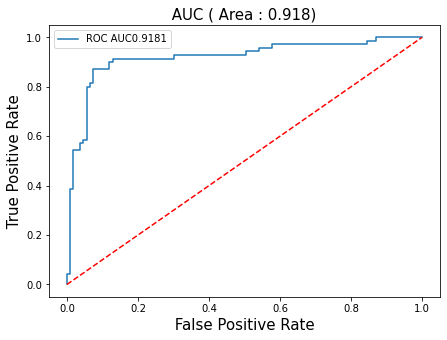

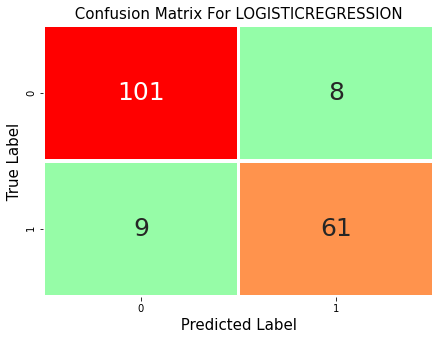

In [28]:
score_test(LogisticRegression(),X,y)

## Success Evaluation with CV and Hyperparameter Optimization with GridSearchCV

In [29]:
logistic_param_grid = \
   {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 5),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000, 2500, 5000]
    }

models = [ ("LR" , LogisticRegression(), logistic_param_grid)]


In [30]:
def base_model_regressor(X , y , models ,cv = 5):
    
    dictinonary = {}
    data = pd.DataFrame()
    index = 0
    
    for name,model,params in models:
        
            results = cross_validate(estimator=model,
                                     X = X,
                                     y = y,
                                     cv = cv,
                                     scoring = ["roc_auc","accuracy"])
            
            data.loc[index,"NAME"] = name
            data.loc[index,"ROC_AUC"] = results["test_roc_auc"].mean()
            data.loc[index,"ACCURACY"] = results["test_accuracy"].mean()
            data.loc[index,"FIT_TIME"] = results["fit_time"].mean()
            data.loc[index,"SCORE_TIME"] = results["score_time"].mean()
            data = data.set_index("NAME")
            
    
    return data
     

In [31]:
base_model_regressor(X ,y, models, cv = 5)

,ROC_AUC,ACCURACY,FIT_TIME,SCORE_TIME
NAME,,,,
LR,0.865,0.828,0.017,0.003


In [32]:
def hyperparameter_optimization(X , y , models, cv = 3):
    
    models_dict = {}
    data = pd.DataFrame()
    index = 0
    
    for name,model,params in models:
        
        cv_results = cross_validate(estimator=model,
                                 X = X,
                                 y = y,
                                 cv = cv,
                                 scoring = ["roc_auc","accuracy"])
        
        roc_auc = cv_results["test_roc_auc"].mean()
        accuracy = cv_results["test_accuracy"].mean()
        
        print("".center(50,"#"),end = "\n\n")
        print(f"For {name.upper()} Before CV :\n\nROC AUC : {roc_auc}\nAccuracy : {accuracy}",end = "\n\n")
        print("".center(50,"#"),end = "\n\n")
            
        best_grid = GridSearchCV(estimator=model,
                                 param_grid=params,
                                 cv=cv,
                                 scoring="roc_auc",
                                 n_jobs=-1,
                                 verbose=0).fit(X,y)
        
        final_model = model.set_params(**best_grid.best_params_)
        
        final_cv_results = cross_validate(estimator=final_model,
                                          X = X,
                                          y = y,
                                          cv = cv,
                                          scoring=["roc_auc","accuracy"])
        
        final_roc_auc = final_cv_results["test_roc_auc"].mean()
        final_accuracy = final_cv_results["test_accuracy"].mean()
        
        print(f"For {name.upper()} After CV : \n\nROC AUC : {final_roc_auc}\nAccuracy : {final_accuracy}",
              end = "\n\n")
        print(f"\n\nFor {name.upper()} Best Params : {best_grid.best_params_}",end = "\n\n")
        print("".center(50,"#"),end = "\n\n")
        
        models_dict[name] = final_model
        
    return models_dict
        

In [33]:
from warnings import filterwarnings
filterwarnings("ignore")

model_dict = hyperparameter_optimization(X, y , models, cv = 10)

##################################################

For LR Before CV :

ROC AUC : 0.8672976261211556
Accuracy : 0.8294007490636703

##################################################

For LR After CV : 

ROC AUC : 0.8684561016325721
Accuracy : 0.8192883895131086



For LR Best Params : {'C': 0.0001, 'max_iter': 1000, 'penalty': 'none', 'solver': 'lbfgs'}

##################################################



In [34]:
for name,regressor,params in models:
    
    model_dict[name].fit(X,y)
    pd.to_pickle(model_dict[name], open(name+"_model.pkl","wb"))

## Final Model

In [35]:
titanic_model = pickle.load(open("LR_model.pkl","rb"))

In [36]:
titanic_model.get_params()

{'C': 0.0001,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'none',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [37]:
def roc_auc_plot(model, X, y):
    
    y_score = model.predict_proba(X)[:,1] 
    
    fpr, tpr, thresholds = roc_curve(y,y_score)
    
    plt.figure(figsize = (7,5))
    plt.plot(fpr, tpr)
    plt.plot([0,1], [0,1] ,"--r")
    size = 15
    plt.xlabel(" False Positive Rate ", fontsize = size)
    plt.ylabel(" True Positive Rate ", fontsize = size)
    plt.title(" AUC (Area : %.3f)" % roc_auc_score(y, y_score) , fontsize = size)
    plt.show()
    
def confusion_matrix_heat(model, X ,y):
    
    y_pred = model.predict(X)
    data = confusion_matrix(y,y_pred)
    
    
    fig , axes = plt.subplots(figsize = (7,5))
 
    axes = sns.heatmap(data , annot = True , annot_kws= {"size" : 23} , fmt = ".3g", linewidths=3,
                      linecolor="white", cbar = False, cmap = "viridis")
    
    size = 15
    plt.xlabel(" Predict Label ", fontsize = size)
    plt.ylabel(" True Label ", fontsize = size)
    plt.title(f" For {type(model).__name__.upper()} Confusion Matrix ", fontsize = size)
    plt.show()
    
    

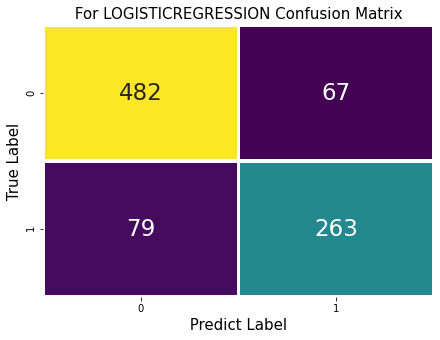

In [38]:
confusion_matrix_heat(titanic_model, X, y)

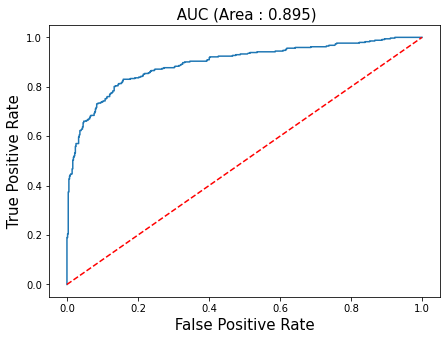

In [39]:
roc_auc_plot(titanic_model, X, y)